In [ ]:
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
pip install torch==1.7.0

     |████████████████████████████████| 776.8MB 22kB/s 
ERROR: torchvision 0.10.0+cu102 has requirement torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.
ERROR: torchtext 0.10.0 has requirement torch==1.9.0, but you'll have torch 1.7.0 which is incompatible.
  Found existing installation: torch 1.9.0+cu102
    Uninstalling torch-1.9.0+cu102:
      Successfully uninstalled torch-1.9.0+cu102


In [ ]:
pip install torchvision==0.8.1

     |████████████████████████████████| 12.7MB 8.1MB/s 
  Found existing installation: torchvision 0.10.0+cu102
    Uninstalling torchvision-0.10.0+cu102:
      Successfully uninstalled torchvision-0.10.0+cu102


In [ ]:
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-3anhbfm0
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-3anhbfm0
  Created wheel for pycocotools: filename=pycocotools-2.0-cp37-cp37m-linux_x86_64.whl size=263901 sha256=ee1ff4c3ee586621a389a3b99e8723c1a1175e6ec657ea9ac7fed59bd1f47f23
  Stored in directory: /tmp/pip-ephem-wheel-cache-yx831jwx/wheels/90/51/41/646daf401c3bc408ff10de34ec76587a9b3ebfac8d21ca5c3a
Successfully built pycocotools
  Found existing installation: pycocotools 2.0.2
    Uninstalling pycocotools-2.0.2:
      Successfully uninstalled pycocotools-2.0.2


In [ ]:
pip install pycocotools==2.0.2

Processing /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e/pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl
  Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycocotools-2.0


In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

In [ ]:
# I am visualizing some images in the 'val/' directory

dataDir='/content/drive/My Drive/d/val'
dataType='COCO_val_annos'
mul_dataType='COCO_mul_val_annos'
annFile='{}/{}.json'.format(dataDir,dataType)
mul_annFile='{}/{}.json'.format(dataDir,mul_dataType)
img_dir = "/content/drive/My Drive/d/img"

In [ ]:
# initialize coco api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.49s)
creating index...
index created!
loading annotations into memory...
Done (t=0.25s)
creating index...
index created!


In [ ]:
# display categories and supercategories

#Single Class #Damage dataset
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories for damages: \n{}\n'.format(', '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories for damages: \n{}\n'.format(', '.join(nms)))

#Multi Class #Parts dataset

mul_cats = mul_coco.loadCats(mul_coco.getCatIds())
mul_nms=[cat['name'] for cat in mul_cats]
print('COCO categories for parts: \n{}\n'.format(', '.join(mul_nms)))

mul_nms = set([mul_cat['supercategory'] for mul_cat in mul_cats])
print('COCO supercategories for parts: \n{}\n'.format(', '.join(mul_nms)))

COCO categories for damages: 
damage

COCO supercategories for damages: 
part

COCO categories for parts: 
headlamp, rear_bumper, door, hood, front_bumper

COCO supercategories for parts: 
part



In [ ]:
# get all images containing 'damage' category, select one at random
catIds = coco.getCatIds(catNms=['damage']);
imgIds = coco.getImgIds(catIds=catIds );

In [ ]:
random_img_id = random.choice(imgIds)
print("{} image id was selected at random from the {} list".format(random_img_id, imgIds))

5 image id was selected at random from the [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10] list


In [ ]:
# Load the image
imgId = coco.getImgIds(imgIds = [random_img_id])
img = coco.loadImgs(imgId)[0]
print("Image details \n",img)

Image details 
 {'coco_url': '', 'date_captured': '2020-07-14 09:59:34.190485', 'file_name': '42.jpg', 'flickr_url': '', 'height': 1024, 'id': 5, 'license': 1, 'width': 1024}


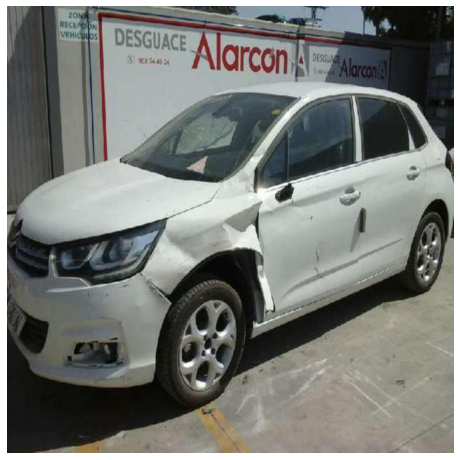

In [ ]:
I = io.imread(img_dir + '/' + img['file_name'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
#get damage annotations
annIds = coco.getAnnIds(imgIds=imgId,iscrowd=None)
anns = coco.loadAnns(annIds)

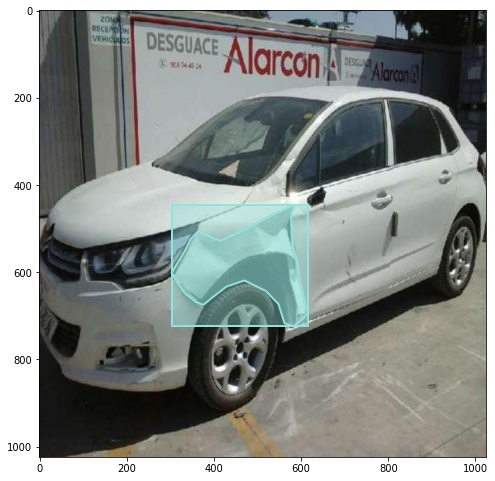

In [ ]:
#Plot damages
plt.imshow(I)
plt.axis('on')
coco.showAnns(anns, draw_bbox=True )

In [ ]:
#get parts annotations
mul_annIds = mul_coco.getAnnIds(imgIds=imgId,iscrowd=None)
mul_anns = mul_coco.loadAnns(mul_annIds)

In [ ]:
# Create a dictionary between category_id and category name
category_map = dict()

for ele in list(mul_coco.cats.values()):
    category_map.update({ele['id']:ele['name']})

In [ ]:
category_map

{1: 'headlamp', 2: 'rear_bumper', 3: 'door', 4: 'hood', 5: 'front_bumper'}

Parts are: ['headlamp', 'front_bumper', 'door', 'hood']


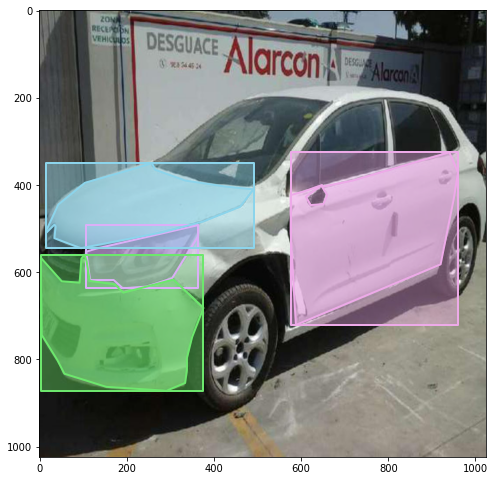

In [ ]:
#Create a list of parts in the image
parts = []
for region in mul_anns:
    parts.append(category_map[region['category_id']])

print("Parts are:", parts) 

#Plot Parts
I = io.imread(img_dir + '/' + img['file_name'])
plt.imshow(I)
plt.axis('on')
mul_coco.showAnns(mul_anns, draw_bbox=True )

In [ ]:
# Install detectron 2
!python -m pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html

Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu102/torch1.7/index.html
     |████████████████████████████████| 6.1MB 5.0MB/s 
     |████████████████████████████████| 51kB 6.9MB/s 
     |████████████████████████████████| 81kB 6.8MB/s 
     |████████████████████████████████| 645kB 9.2MB/s 
     |████████████████████████████████| 112kB 15.2MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0.2-cp37-cp37m-linux_x86_64.whl size=263981 sha256=b6daa1030eb81a07dd8db417a1d44949600e2e7cc819ba3c0e1ca44c15c59c65
  Stored in directory: /root/.cache/pip/wheels/68/a5/e7/56401832f23d0b2db351c5b682e466cb4841960b086da65e4e
  Created wheel for fvcore: filename=fvcore-0.1.3.post20210317-cp37-none-any.whl size=58543 sha256=97e7001ab61c7b8c2510b14664293d464209353e8c80f36c1cf9a2b4ed455461
  Stored in directory: /root/.cache/pip/wheels/d2/ee/3a/5c531df777c03d8c67f22c65f97d6f75321087482d05a9b218
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.8-cp3

In [ ]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import random
pylab.rcParams['figure.figsize'] = (8.0, 10.0)# Import Libraries

# For visualization
import os
import seaborn as sns
from matplotlib import colors
from tensorboard.backend.event_processing import event_accumulator as ea
from PIL import Image

# Scipy for calculating distance
from scipy.spatial import distance


In [ ]:
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())

1.7.0 True


In [ ]:
assert torch.__version__.startswith("1.7")


Set constant variables


In [ ]:
# initialize coco api for instance annotations
coco=COCO(annFile)
mul_coco=COCO(mul_annFile)

loading annotations into memory...
Done (t=0.00s)
creating index...
index created!
loading annotations into memory...
Done (t=0.00s)
creating index...
index created!


In [ ]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import skimage.io as io

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog
from detectron2.engine import DefaultTrainer
from detectron2.utils.visualizer import ColorMode
from detectron2.evaluation import COCOEvaluator, inference_on_dataset
from detectron2.data import build_detection_test_loader

# Set base params
plt.rcParams["figure.figsize"] = [16,9]

In [ ]:
!python -m detectron2.utils.collect_env

----------------------  ---------------------------------------------------------
sys.platform            linux
Python                  3.7.10 (default, May  3 2021, 02:48:31) [GCC 7.5.0]
numpy                   1.19.5
detectron2              0.4 @/usr/local/lib/python3.7/dist-packages/detectron2
Compiler                GCC 7.3
CUDA compiler           CUDA 10.2
detectron2 arch flags   3.7, 5.0, 5.2, 6.0, 6.1, 7.0, 7.5
DETECTRON2_ENV_MODULE   <not set>
PyTorch                 1.7.0 @/usr/local/lib/python3.7/dist-packages/torch
PyTorch debug build     True
GPU available           True
GPU 0                   Tesla T4 (arch=7.5)
CUDA_HOME               /usr/local/cuda
Pillow                  7.1.2
torchvision             0.8.1 @/usr/local/lib/python3.7/dist-packages/torchvision
torchvision arch flags  3.5, 5.0, 6.0, 7.0, 7.5
fvcore                  0.1.3.post20210317
cv2                     4.1.2
----------------------  ---------------------------------------------------------
PyTorch bui

In [ ]:

dataset_dir = "/content/drive/My Drive/d"
img_dir = "img/"
train_dir = "train/"
val_dir = "val/"

In [ ]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("car_dataset_train1", {}, os.path.join(dataset_dir,train_dir,"COCO_mul_train_annos.json"), os.path.join(dataset_dir,img_dir))
register_coco_instances("car_dataset_val1", {}, os.path.join(dataset_dir,val_dir,"COCO_mul_val_annos.json"), os.path.join(dataset_dir,img_dir))

In [ ]:
#Implementing my own Trainer Module here to use the COCO validation evaluation during training
# TODO: add data custom augmentation 
class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [ ]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("car_dataset_train1",)
cfg.DATASETS.TEST = ("car_dataset_val1",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.001  # pick a good LR
cfg.SOLVER.WARMUP_ITERS = 800
cfg.SOLVER.MAX_ITER = 300 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (600, 1550)
cfg.SOLVER.GAMMA = 0.05
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this  dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 5  # only has one class (damage) + 1
cfg.MODEL.RETINANET.NUM_CLASSES = 5 # only has one class (damage) + 1
cfg.TEST.EVAL_PERIOD = 600



# Clear any logs from previous runs
#TODO add timestamp to logs
!rm -rf cfg.OUTPUT_DIR


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[07/10 11:24:12 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:02, 68.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (6, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (6,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (20, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (20,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to

[07/10 11:24:18 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:348: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/

[07/10 11:24:26 d2.utils.events]:  eta: 0:01:38  iter: 19  total_loss: 3.281  loss_cls: 1.715  loss_box_reg: 0.7515  loss_mask: 0.6941  loss_rpn_cls: 0.1011  loss_rpn_loc: 0.02163  time: 0.3546  data_time: 0.0665  lr: 2.4726e-05  max_mem: 1867M
[07/10 11:24:33 d2.utils.events]:  eta: 0:01:32  iter: 39  total_loss: 2.934  loss_cls: 1.304  loss_box_reg: 0.7154  loss_mask: 0.6899  loss_rpn_cls: 0.07298  loss_rpn_loc: 0.02335  time: 0.3515  data_time: 0.0226  lr: 4.9701e-05  max_mem: 1867M
[07/10 11:24:40 d2.utils.events]:  eta: 0:01:22  iter: 59  total_loss: 2.415  loss_cls: 0.8541  loss_box_reg: 0.729  loss_mask: 0.6773  loss_rpn_cls: 0.08071  loss_rpn_loc: 0.02002  time: 0.3469  data_time: 0.0054  lr: 7.4676e-05  max_mem: 1867M
[07/10 11:24:47 d2.utils.events]:  eta: 0:01:16  iter: 79  total_loss: 2.426  loss_cls: 0.7932  loss_box_reg: 0.8483  loss_mask: 0.6624  loss_rpn_cls: 0.04074  loss_rpn_loc: 0.02426  time: 0.3475  data_time: 0.0045  lr: 9.9651e-05  max_mem: 1867M
[07/10 11:24:53 

In [ ]:

evaluator = COCOEvaluator("car_dataset_val1", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "car_dataset_val1")
print(inference_on_dataset(trainer.model, val_loader, evaluator))

WARNING [07/10 11:26:59 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass in explicit arguments instead.
[07/10 11:26:59 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/My Drive/d/val/COCO_mul_val_annos.json
[07/10 11:26:59 d2.data.dataset_mapper]: [DatasetMapper] Augmentations used in inference: [ResizeShortestEdge(short_edge_length=(800, 800), max_size=1333, sample_style='choice')]
[07/10 11:26:59 d2.data.common]: Serializing 11 elements to byte tensors and concatenating them all ...
[07/10 11:26:59 d2.data.common]: Serialized dataset takes 0.01 MiB
[07/10 11:26:59 d2.evaluation.evaluator]: Start inference on 11 images
[07/10 11:27:03 d2.evaluation.evaluator]: Inference done 11/11. 0.0995 s / img. ETA=0:00:00
[07/10 11:27:03 d2.evaluation.evaluator]: Total inference time: 0:00:01.646869 (0.274478 s / img per device, on 1 devices)
[07/10 11:27:03 d2.evaluation.evaluator]: Total inference pure 

In [ ]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set a custom testing threshold for this model
cfg.DATASETS.TEST = ("car_dataset_val1", )
predictor = DefaultPredictor(cfg)

In [ ]:
val_dataset_dicts = DatasetCatalog.get("car_dataset_val1")
val_metadata_dicts = MetadataCatalog.get("car_dataset_val1")

[07/10 11:27:12 d2.data.datasets.coco]: Loaded 11 images in COCO format from /content/drive/My Drive/d/val/COCO_mul_val_annos.json


In [ ]:
parts_class_map={0:'headlamp',1:'rear_bumper', 2:'door', 3:'hood', 4: 'front_bumper'}


In [ ]:
def get_segment_area(im, outputs):
	total_area = im.shape[0] * im.shape[1]
	outputnump = outputs["instances"].to("cpu").pred_masks.numpy()
	instance_area_list = []
	for i in range(len(outputnump)):
		true_cords_list = []
		count = 0
		for y_cord in range(len(outputnump[i])):
			for x_cord in range(len(outputnump[i][0])):
				if str(outputnump[i][y_cord][x_cord]) == "True" and (x_cord,y_cord) not in true_cords_list:
					count += 1 
		instance_area_list.append(round(count/total_area,4))
		
	area_list = torch.Tensor(instance_area_list)
	outputs["instances"].area = area_list
	
	return outputs

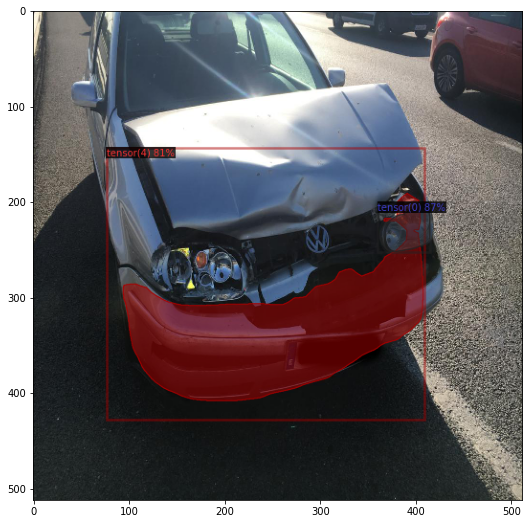

In [ ]:
im = io.imread("/content/drive/My Drive/d/train/50.jpg")

#part inference
parts_outputs = predictor(im)
parts_outputs = get_segment_area(im, parts_outputs)
parts_v = Visualizer(im[:, :, ::-1],
                   metadata=MetadataCatalog.get("car_mul_dataset_val"), 
                   scale=0.5, 
                   instance_mode=ColorMode.IMAGE   # remove the colors of unsegmented pixels. This option is only available for segmentation models
)
parts_out = parts_v.draw_instance_predictions(parts_outputs["instances"].to("cpu"))

#plot
#ax1.imshow(damage_out.get_image()[:, :, ::-1],)
plt.imshow(parts_out.get_image()[:, :, ::-1])

In [ ]:
im = io.imread("/content/drive/My Drive/d/train/73.jpg")

#part inference
parts_outputs = predictor(im)
get_segment_area(im, parts_outputs)



{'instances': Instances(num_instances=2, image_height=1024, image_width=1024, fields=[pred_boxes: Boxes(tensor([[ 633.1699,  131.4999,  740.3239,  507.1198],
         [ 228.7045,  455.5157,  821.7487, 1024.0000]], device='cuda:0')), scores: tensor([0.8931, 0.7327], device='cuda:0'), pred_classes: tensor([0, 1], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, 

In [ ]:
parts_outputs

{'instances': Instances(num_instances=2, image_height=1024, image_width=1024, fields=[pred_boxes: Boxes(tensor([[ 633.1699,  131.4999,  740.3239,  507.1198],
         [ 228.7045,  455.5157,  821.7487, 1024.0000]], device='cuda:0')), scores: tensor([0.8931, 0.7327], device='cuda:0'), pred_classes: tensor([0, 1], device='cuda:0'), pred_masks: tensor([[[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False]],
 
         [[False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          [False, False, False,  ..., False, False, False],
          ...,
          [False, False, False,  ..., False, False, False],
          [False, False, 

In [ ]:
damage_prediction_classes = [ parts_class_map[el] + "_" + str(indx) for indx,el in enumerate(parts_outputs["instances"].pred_classes.tolist())]


In [ ]:
damage_prediction_classes

['headlamp_0', 'front_bumper_1', 'door_2']

In [ ]:
Total 